### Phase 1: Data Collection and Preparation

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Initial inspection
print(train_df.shape)
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())
print(train_df.duplicated().sum())

# Data Cleaning
# Fill missing values
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

# Convert data types if needed
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(int)

# Remove outliers (optional)
train_df = train_df[train_df['LoanAmount'] < train_df['LoanAmount'].quantile(0.99)]


(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000

C:\Users\kuforiji oluwaseun\AppData\Local\Temp\ipykernel_15052\1122139718.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
C:\Users\kuforiji oluwaseun\AppData\Local\Temp\ipykernel_15052\1122139718.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

### Phase 2: Exploratory Data Analysis (EDA)

count      607.000000
mean      5166.802306
std       5549.836227
min        150.000000
25%       2874.000000
50%       3762.000000
75%       5705.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64
count    607.000000
mean     140.652389
std       69.395096
min        9.000000
25%      100.000000
50%      128.000000
75%      161.000000
max      495.000000
Name: LoanAmount, dtype: float64


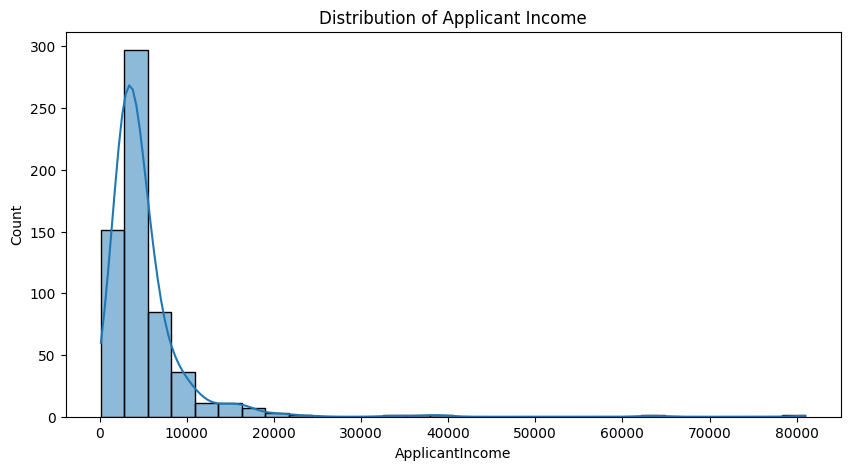

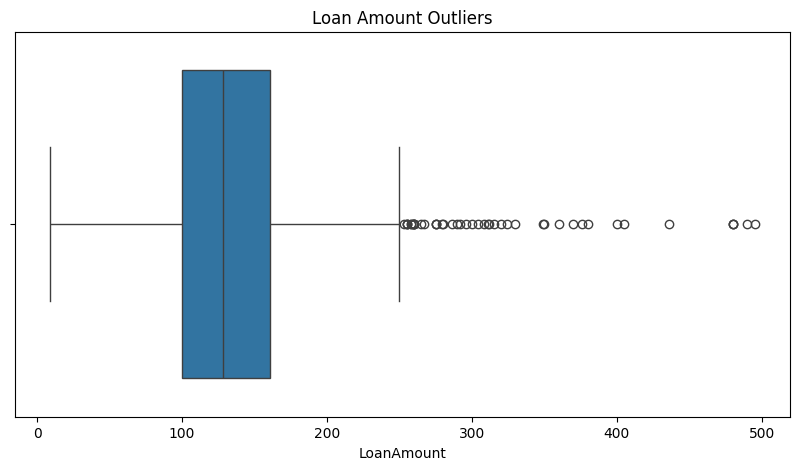

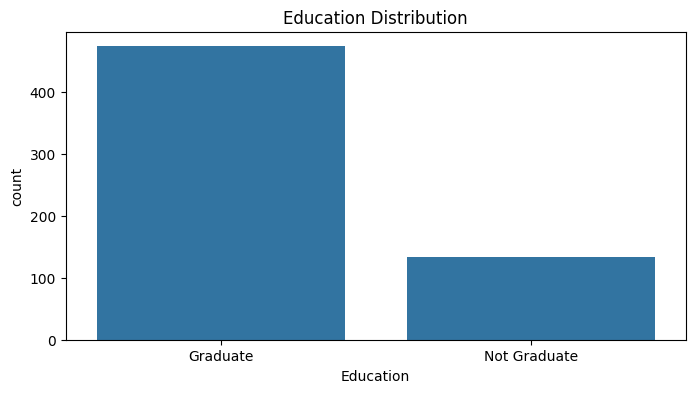

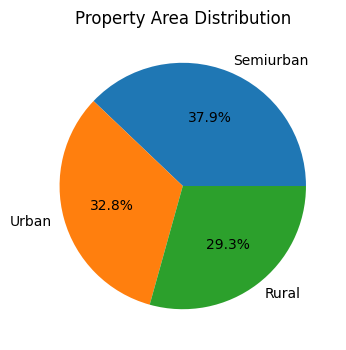

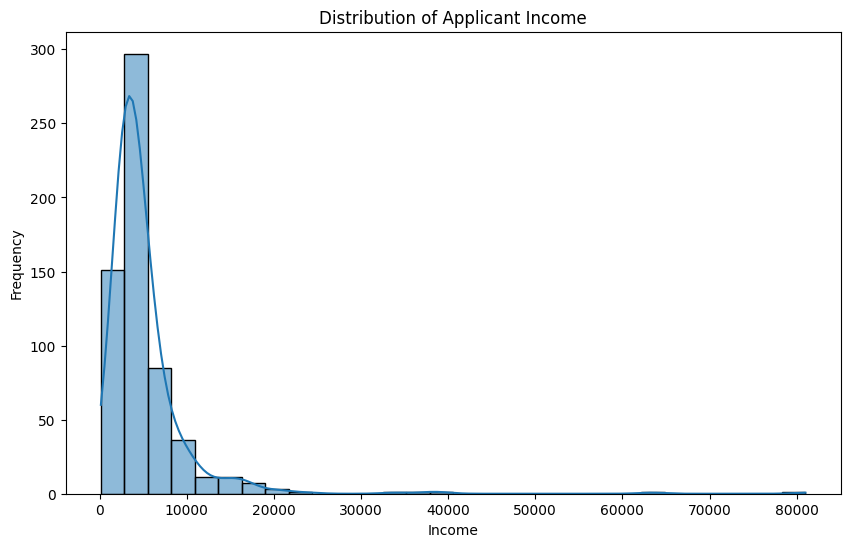

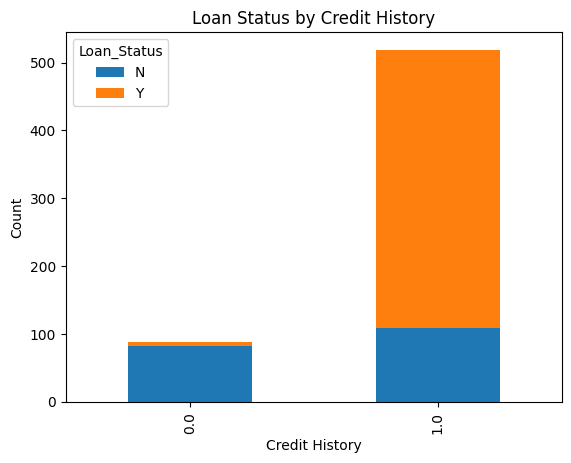

In [15]:

# Descriptive statistics
print(train_df['ApplicantIncome'].describe())
print(train_df['LoanAmount'].describe())

# Histograms
plt.figure(figsize=(10,5))
sns.histplot(train_df['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

# Box plots
plt.figure(figsize=(10,5))
sns.boxplot(x=train_df['LoanAmount'])
plt.title('Loan Amount Outliers')
plt.show()

# Categorical analysis
plt.figure(figsize=(8,4))
sns.countplot(x='Education', data=train_df)
plt.title('Education Distribution')
plt.show()

plt.figure(figsize=(8,4))
train_df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Property Area Distribution')
plt.ylabel('')
plt.show()

# Correlation matrix
plt.figure(figsize=(10,6))
sns.histplot(train_df['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


# Loan approval vs credit history
approval_by_credit = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
approval_by_credit.plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()




### Phase 3: Reporting and Insights

#### Task 3.1: Summarize Key Findings
## Key Findings

- **Income vs. Loan Approval**: Applicants with higher income levels showed a higher likelihood of loan approval, but not always—credit history played a more decisive role.
- **Credit History Impact**: Applicants with a credit history score of 1 had significantly higher approval rates.
- **Property Area Trends**: Urban and semiurban areas had more approved loans compared to rural areas.
- **Education & Employment**: Graduates and non-self-employed applicants had slightly higher approval rates.
- **Loan Amount Distribution**: Most loans were under a certain threshold (e.g., ₹150,000), with outliers skewing the average.


#### Task 3.2: Create Visual Dashboards
import plotly.express as px

fig = px.histogram(train_df, x='ApplicantIncome', color='Loan_Status', nbins=30, title='Income Distribution by Loan Status')
fig.show()


### Task 3.3: Document the EDA Process
### Home Loan EDA Report

### Introduction
Brief overview of the dataset and project goals.

### Methodology
Steps taken for data cleaning, handling missing values, and outlier treatment.

### Exploratory Analysis
Summary of descriptive statistics and visualizations.

### Insights
Key patterns and relationships discovered.

### Recommendations
Suggestions for predictive modeling or business strategy (e.g., prioritize applicants with strong credit history).

### Appendix
Include charts, code snippets, and any additional notes.
